### Load the packages

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# spearman correlation
from scipy.stats import spearmanr

C:\Users\nial\AppData\Local\Temp\ipykernel_27372\1724573042.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Load the data

In [8]:
# gdf_kigali = gpd.read_file(r"C:\Users\nial\OneDrive\ETH Zürich\Statslab 2024\LAEI\Paper-plots-QGIS-layers\All-features-V2.gpkg")
# gdf_kigali = gdf_kigali.drop(columns=['Hotspot score DEM', 'Hotspot scores SETTLEMENT', 'Sum of DEM', 'Sum of settlement values'])
gdf_kigali = gdf_kigali[gdf_kigali['Number of measurements'].notna()]
gdf_kigali.head()

,Hotspot Scores,Number of roads,Main road,Number of DEM tiles,Mean of DEM,Median of DEM,Number of settlement tiles,Mean of settlement values,Median of settlement values,Median raw PM2.5,Number of measurements,geometry
103,0.626543,NaN,0.0,340.0,1614.973529,1617.0,342.0,8.479532,3.0,34.130001,1.0,"MULTIPOLYGON (((30.08032 -1.85194, 30.08032 -1..."
503,0.632346,NaN,0.0,340.0,1552.885294,1554.0,325.0,0.000000,0.0,34.189999,1.0,"MULTIPOLYGON (((30.08032 -1.85504, 30.08032 -1..."
686,0.614219,NaN,0.0,323.0,1634.195046,1634.0,342.0,21.052632,10.0,19.209999,68.0,"MULTIPOLYGON (((30.05043 -1.85659, 30.05043 -1..."
687,0.618532,NaN,0.0,340.0,1628.997059,1629.0,329.0,15.458967,4.0,17.400000,88.0,"MULTIPOLYGON (((30.05219 -1.85659, 30.05219 -1..."
688,0.623640,NaN,0.0,323.0,1622.167183,1622.0,336.0,16.014881,7.0,17.820000,74.0,"MULTIPOLYGON (((30.05395 -1.85659, 30.05395 -1..."


In [9]:
gdf_kigali.columns

Index(['Hotspot Scores', 'Number of roads', 'Main road', 'Number of DEM tiles',
       'Mean of DEM', 'Median of DEM', 'Number of settlement tiles',
       'Mean of settlement values', 'Median of settlement values',
       'Median raw PM2.5', 'Number of measurements', 'geometry'],
      dtype='object')

In [10]:
spearmanr(gdf_kigali['Mean of DEM'], gdf_kigali['Hotspot Scores'])

SignificanceResult(statistic=-0.08117250186710255, pvalue=1.5675821430883874e-07)

In [11]:
spearmanr(gdf_kigali['Mean of settlement values'], gdf_kigali['Hotspot Scores'])

SignificanceResult(statistic=0.21643502951414964, pvalue=2.5435923312585795e-45)

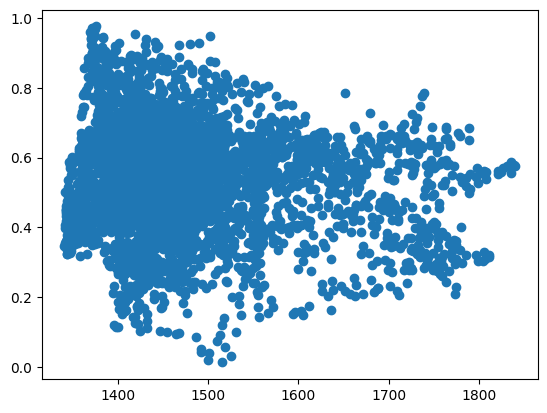

In [14]:
plt.plot(gdf_kigali['Mean of DEM'], gdf_kigali['Hotspot Scores'], 'o')

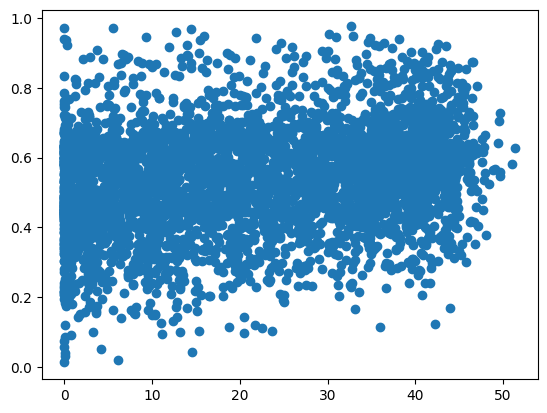

In [15]:
plt.plot(gdf_kigali['Mean of settlement values'], gdf_kigali['Hotspot Scores'], 'o')

In [13]:
print("Mean hotspot score when main road:", gdf_kigali[gdf_kigali['Main road'] == 1]['Hotspot Scores'].mean())
print("Mean hotspot score when no main road:", gdf_kigali[gdf_kigali['Main road'] != 1]['Hotspot Scores'].mean())

Mean hotspot score when main road: 0.5817255467060459
Mean hotspot score when no main road: 0.5182500223641703


In [16]:
# define column 'Classification' as 'Hotspot' if 'Hotspot Scores' > 0.8, 'Coldspot' if < 0.2, else 'Neutral'
gdf_kigali['Classification'] = np.where(gdf_kigali['Hotspot Scores'] > 0.8, 'Hotspot', np.where(gdf_kigali['Hotspot Scores'] < 0.2, 'Coldspot', 'Neutral'))

c:\Users\nial\anaconda3\envs\Statslab\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [19]:
# Make a table enumerating the unique combinations of 'Classification' and 'Main road', and counting the number of occurrences of each combination
table = pd.crosstab(gdf_kigali['Classification'], gdf_kigali['Main road'])
table

Main road,0.0,1.0
Classification,,
Coldspot,59,1
Hotspot,70,114
Neutral,2595,1324


In [ ]:
# Make a table giving the mean and standard deviation of 'Mean of DEM' and 'Mean of settlement values' for each 'Classification'
table2 = gdf_kigali.groupby('Classification').agg({'Mean of DEM': ['mean', 'std'], 'Mean of settlement values': ['mean', 'std']})
table2

Mean of DEM            Mean of settlement values           
                       mean        std                      mean        std
Classification                                                             
Coldspot        1478.263824  66.889817                 10.548769  10.545996
Hotspot         1420.978441  48.179361                 27.031907  13.993332
Neutral         1479.908618  97.203789                 21.819932  14.289564